# Imports

In [73]:
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Reading data

In [74]:
df_list = []
for i in range(0, 10):
    df_results = pd.read_csv(f"./data/output/eswaR1s_1_{i}.csv", header=[0, 1], index_col=[0, 1])
    df_results.columns = pd.MultiIndex.from_tuples(
    [(method, int(dim.split(": ")[1])) for method, dim in df_results.columns],
    names=["method", "dim"],
    )
    df_results.index = pd.MultiIndex.from_tuples([(heu, int(p.split(": ")[1])) for p, heu in df_results.index])
    df_list.append(df_results)
df_results = pd.concat(df_list)

# Line plots

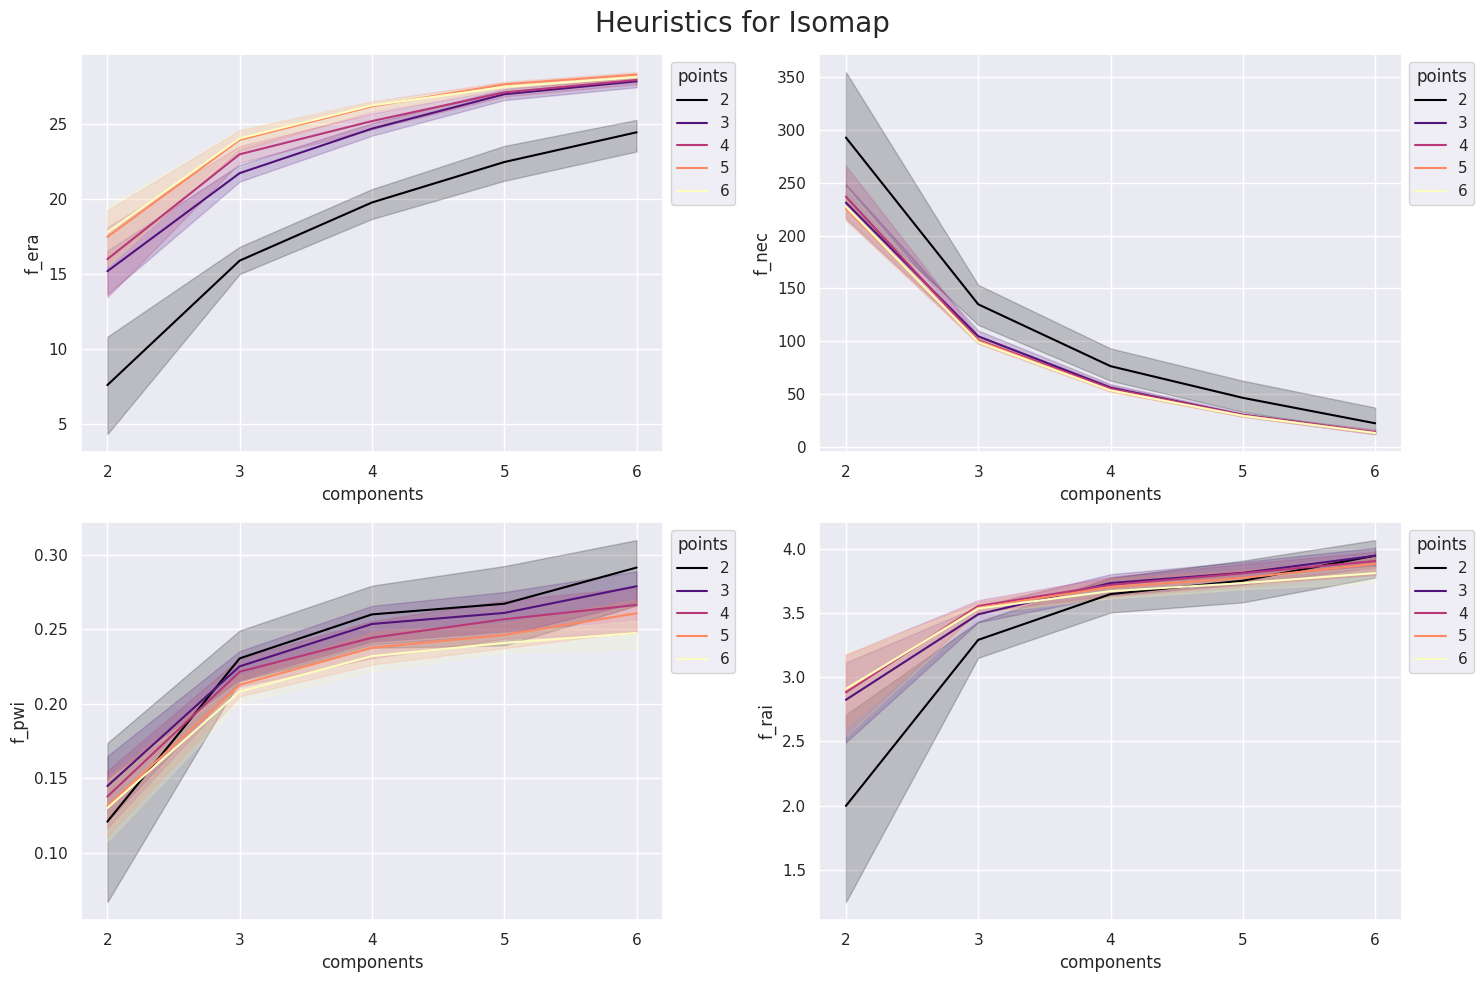

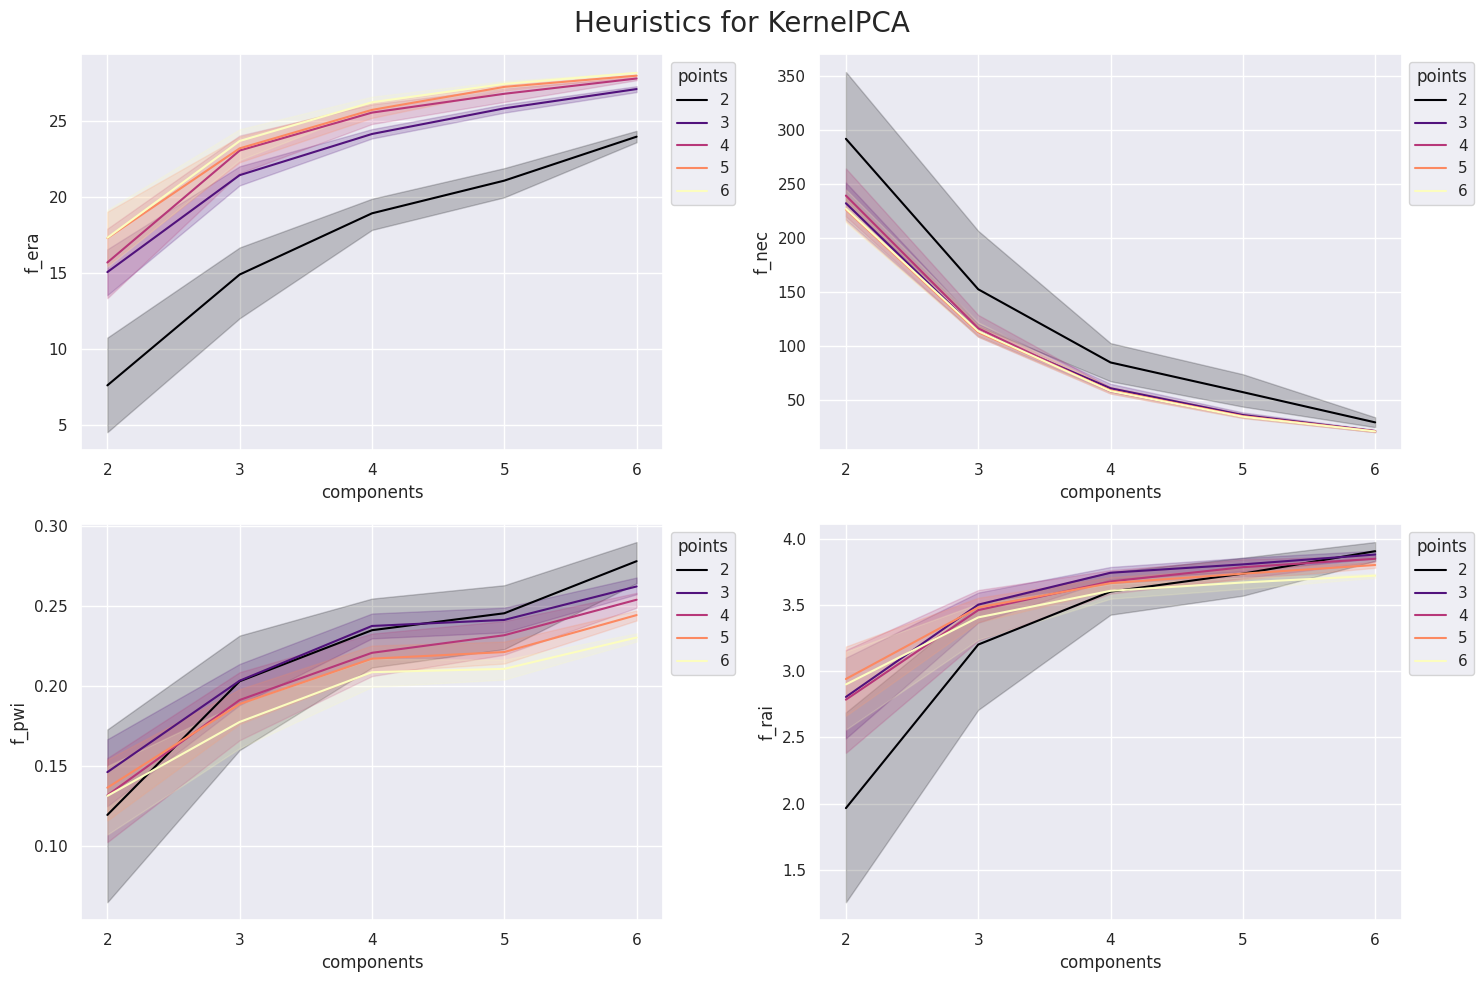

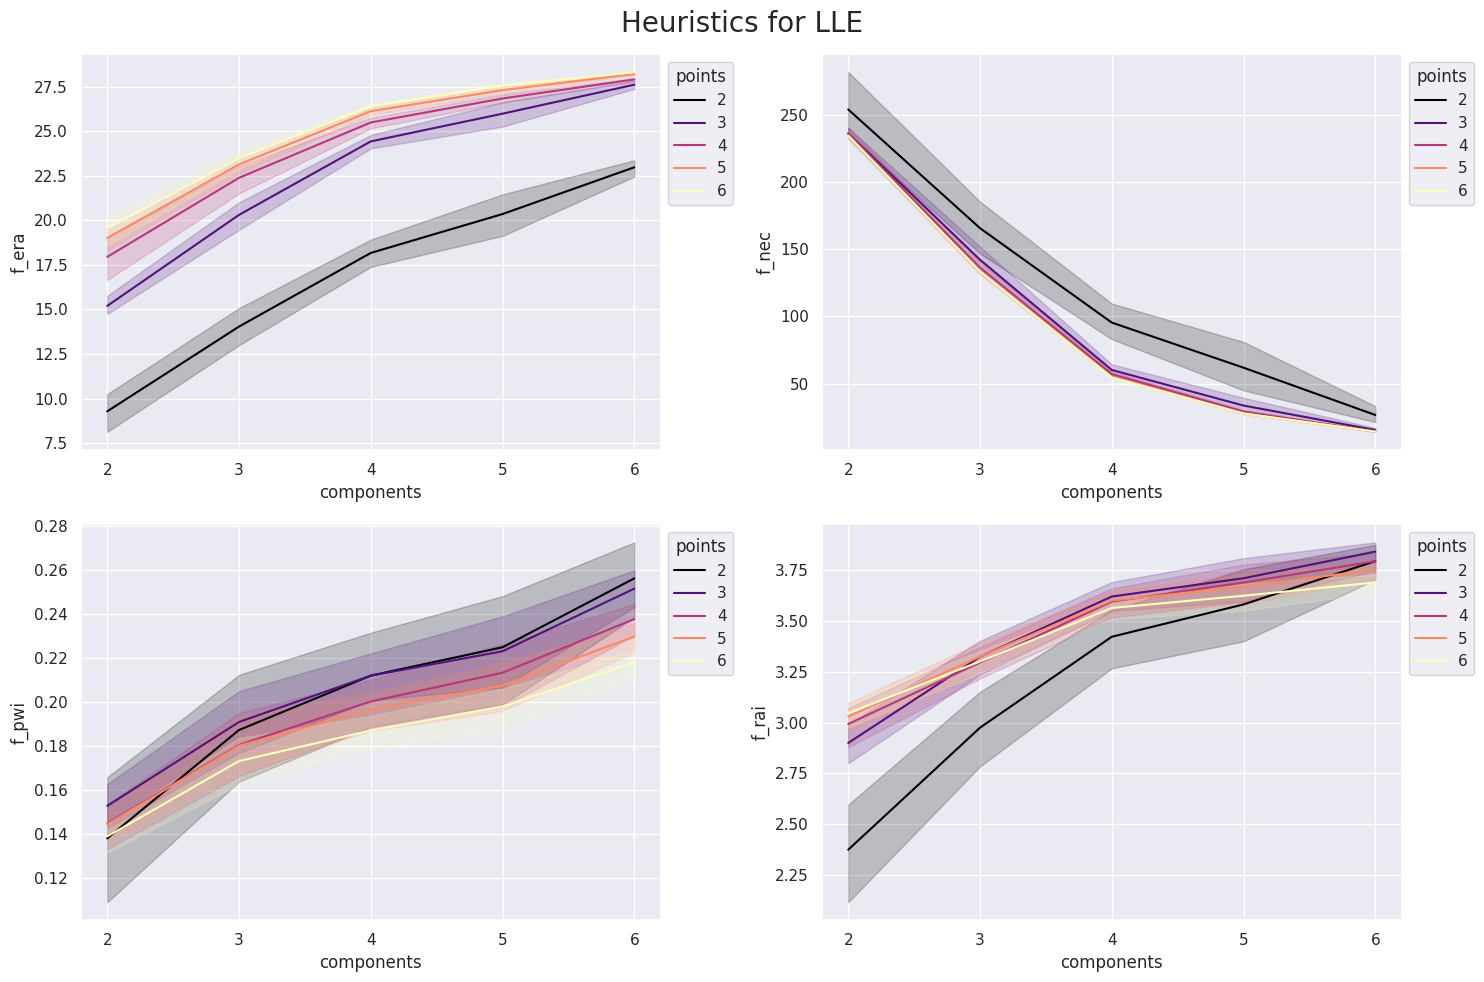

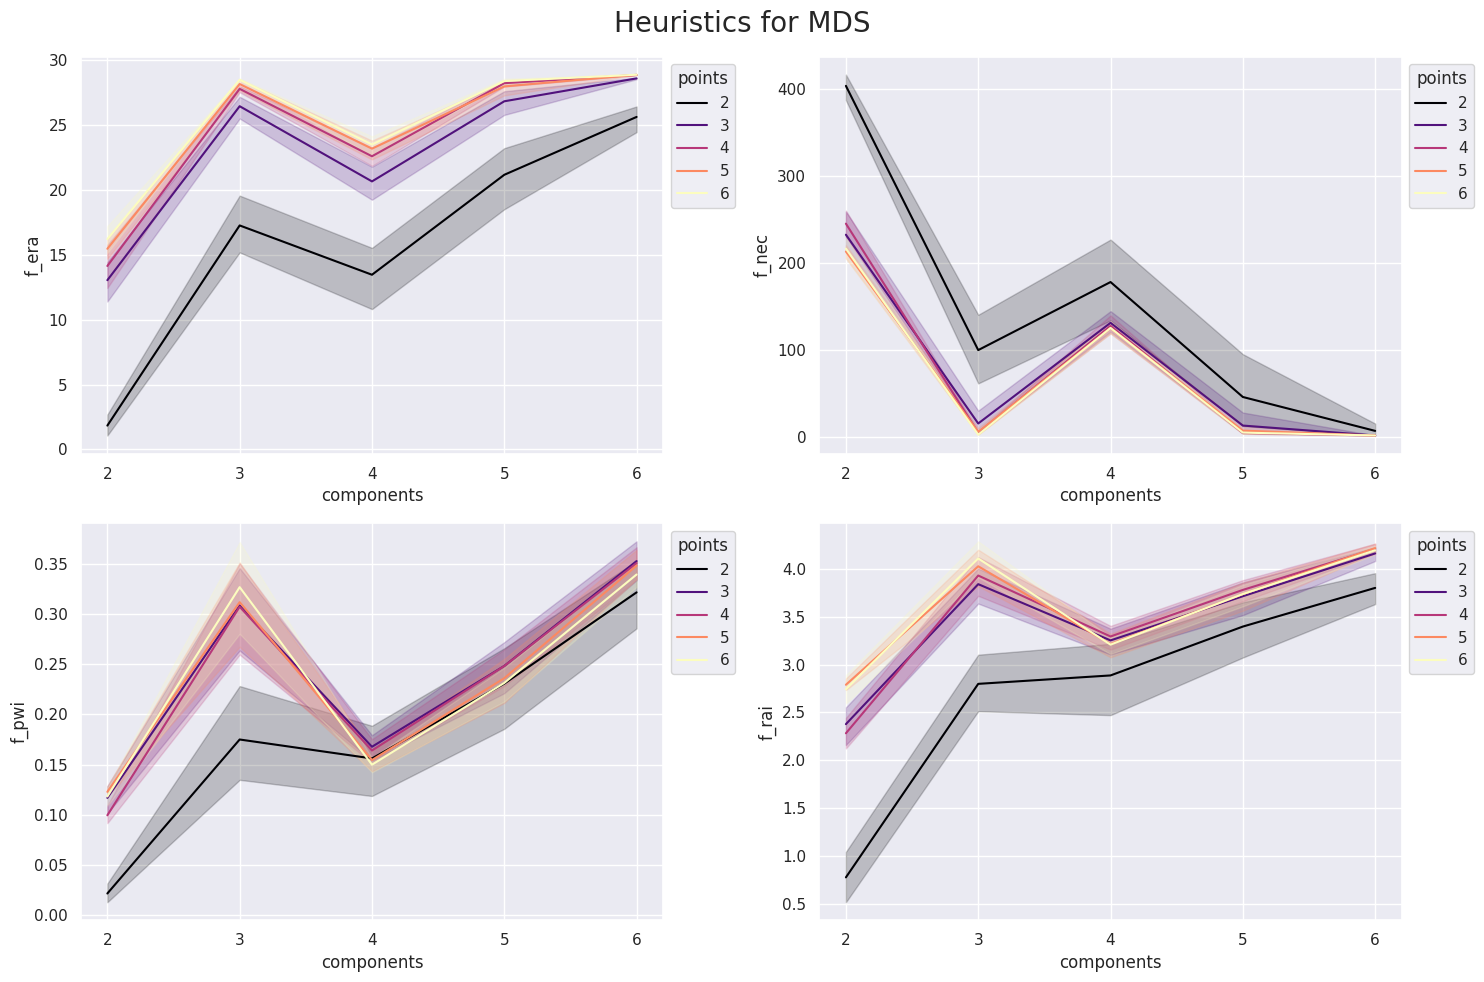

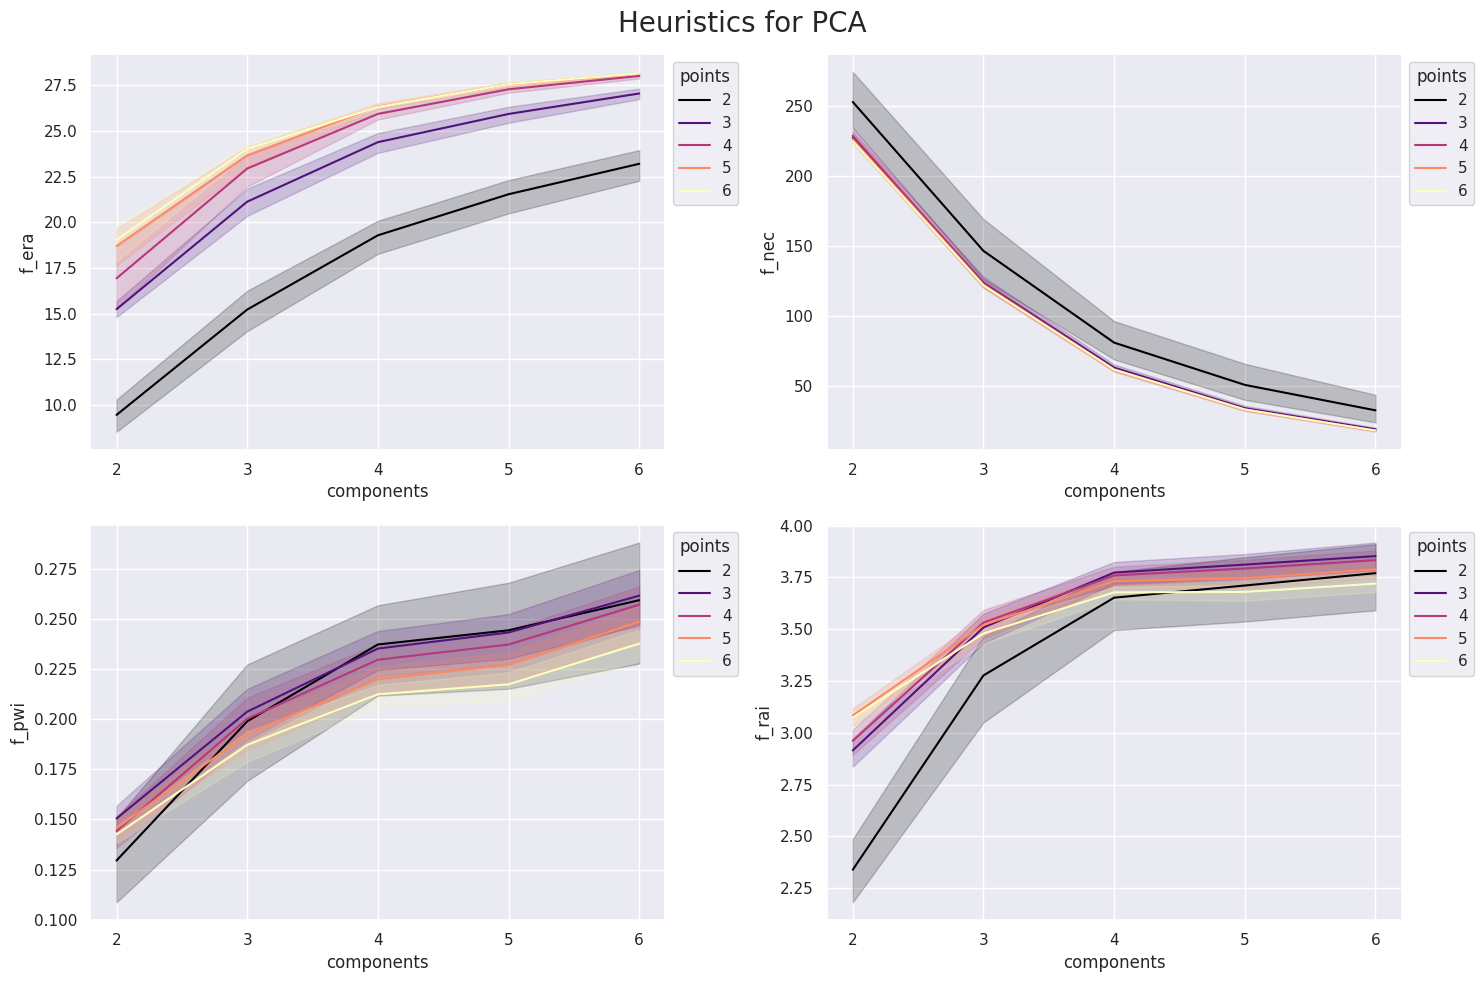

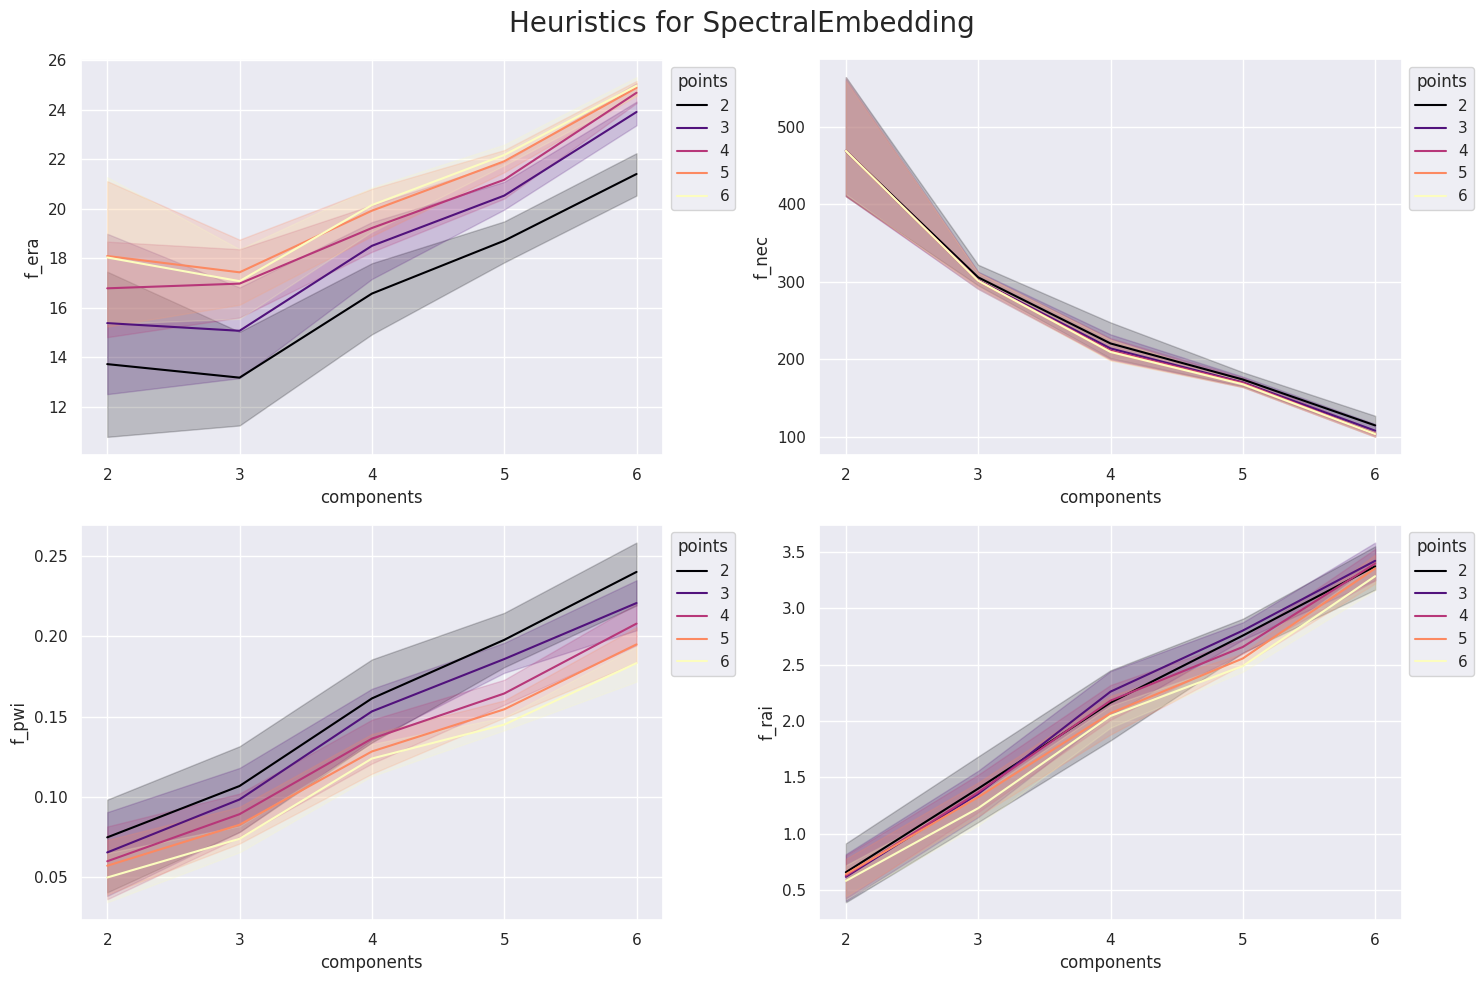

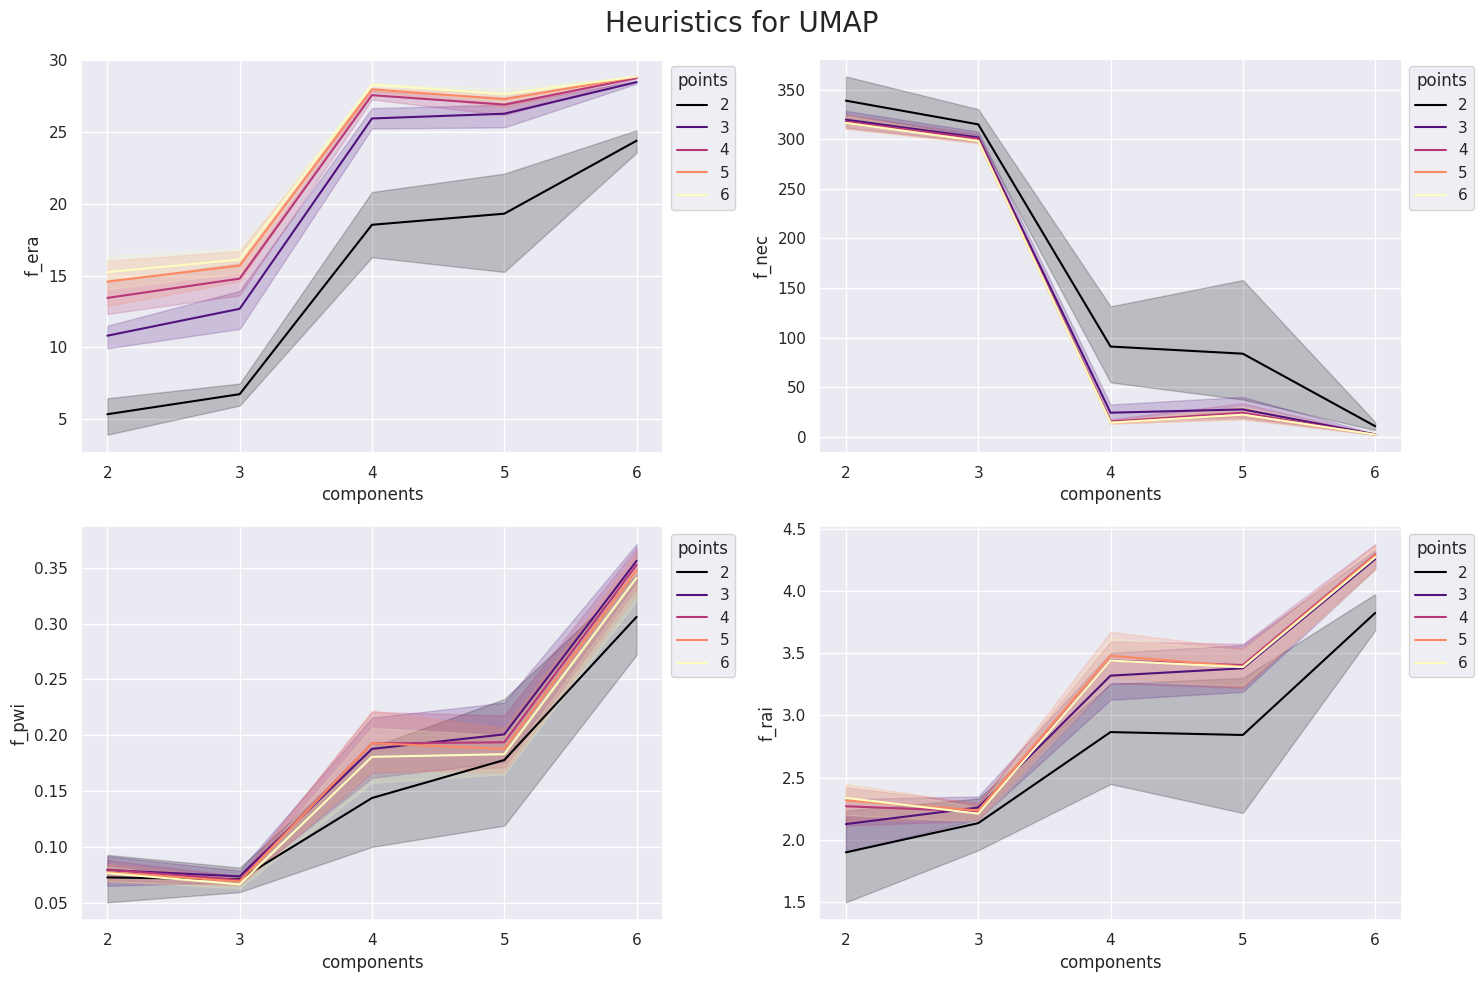

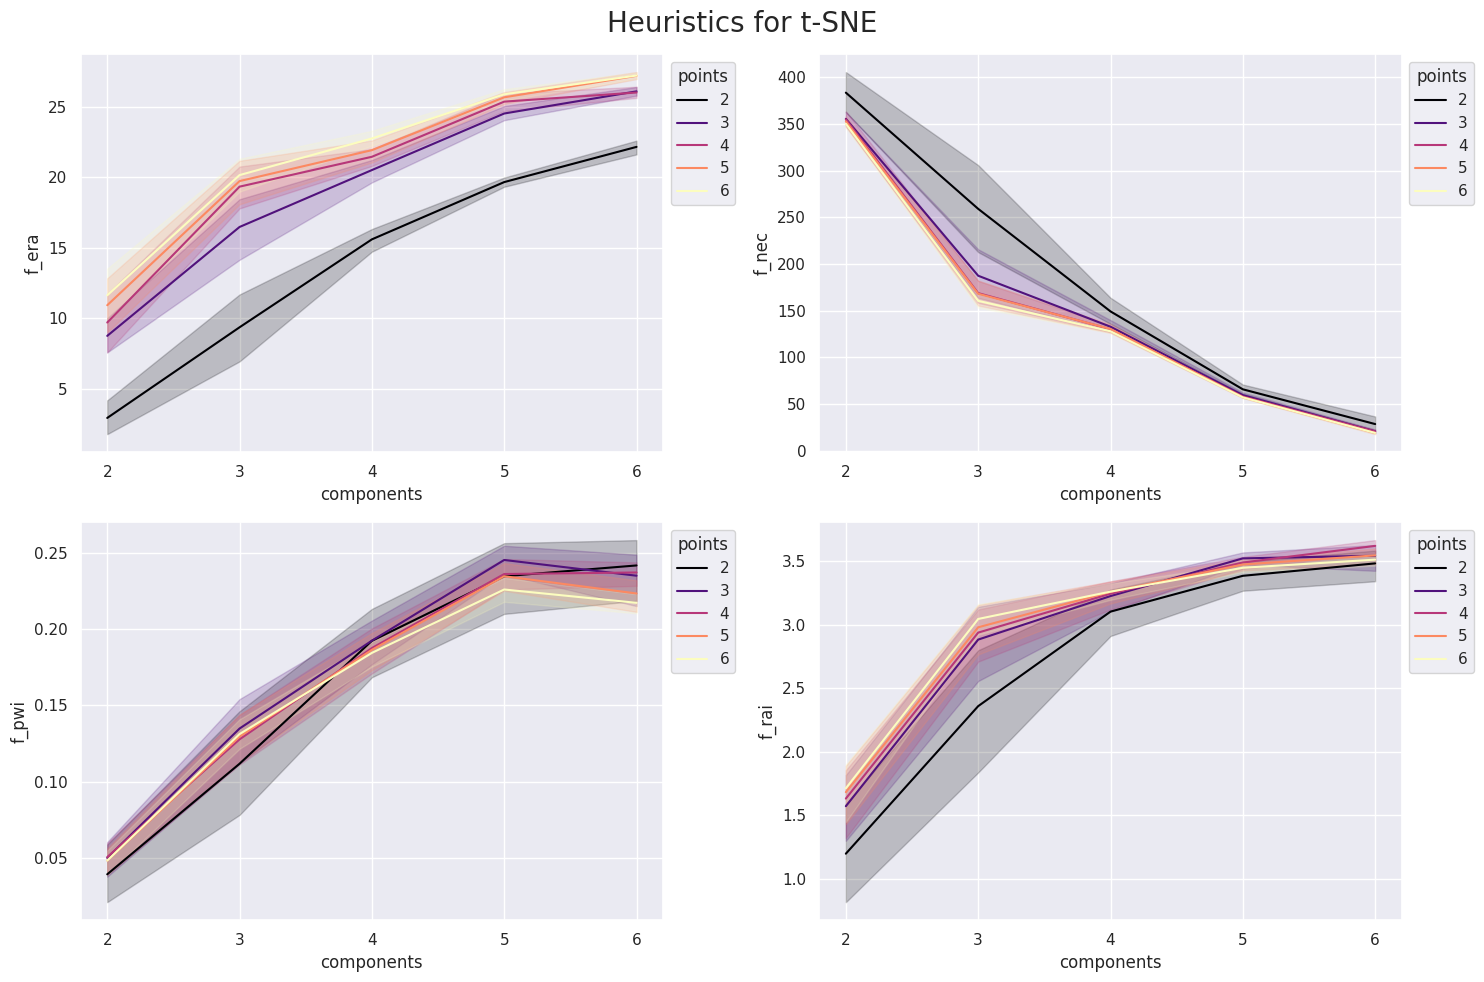

In [75]:
unique_n_points = df_results.index.get_level_values(1).unique()
heuristics = df_results.index.get_level_values(0).unique()

methods = df_results.columns.get_level_values(0).unique()

X = "components"
COLOR = "points"

for method in methods:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, heuristic in enumerate(heuristics):
        df_r = (
            df_results[method]
            .loc[heuristic]
            .reset_index(names="points")
            .melt(id_vars=["points"], var_name="components", value_name="value")
        )
        df_r.components = df_r.components.astype(np.float64)
        sns.lineplot(x=X, y="value", hue=COLOR, data=df_r, ax=axes[i], palette="magma")
        axes[i].set_xticks(df_r[X].unique())
        axes[i].set_ylabel(heuristic)
        handles, _ = axes[i].get_legend_handles_labels()
        axes[i].legend(title=COLOR, handles=handles, loc='upper left', bbox_to_anchor=(1, 1), markerscale=5)

    plt.suptitle(f"Heuristics for {method}", fontsize=20)
    plt.tight_layout()
    plt.savefig(f"data/plots/eswaR1s_{method}.png")
    plt.show()

# Heat maps

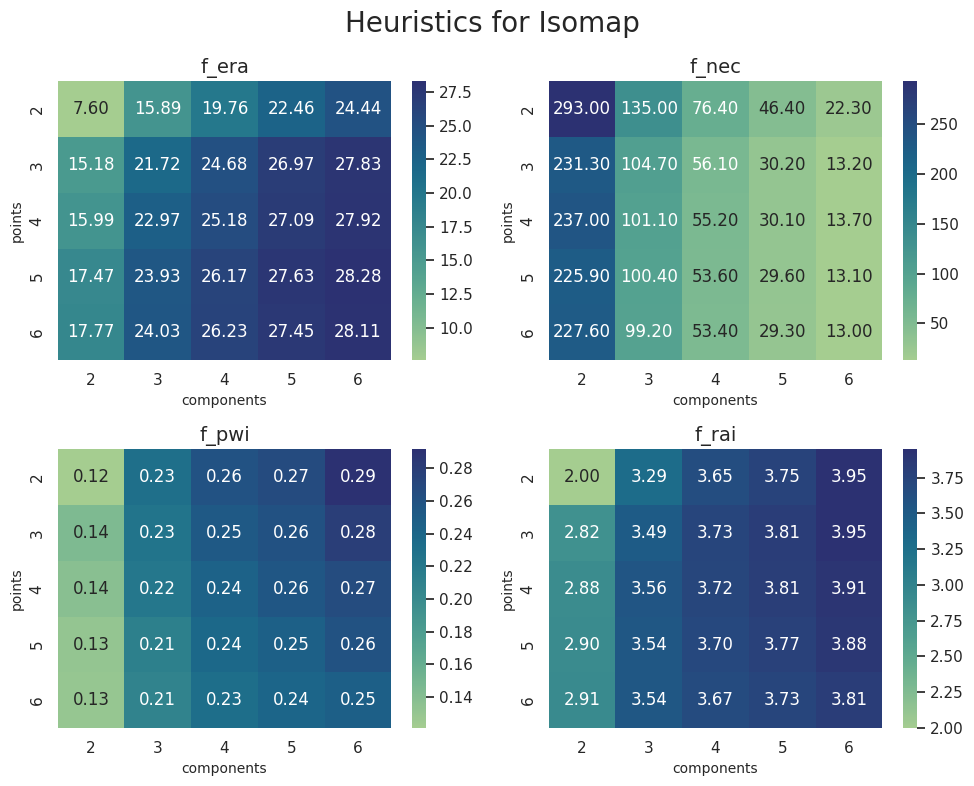

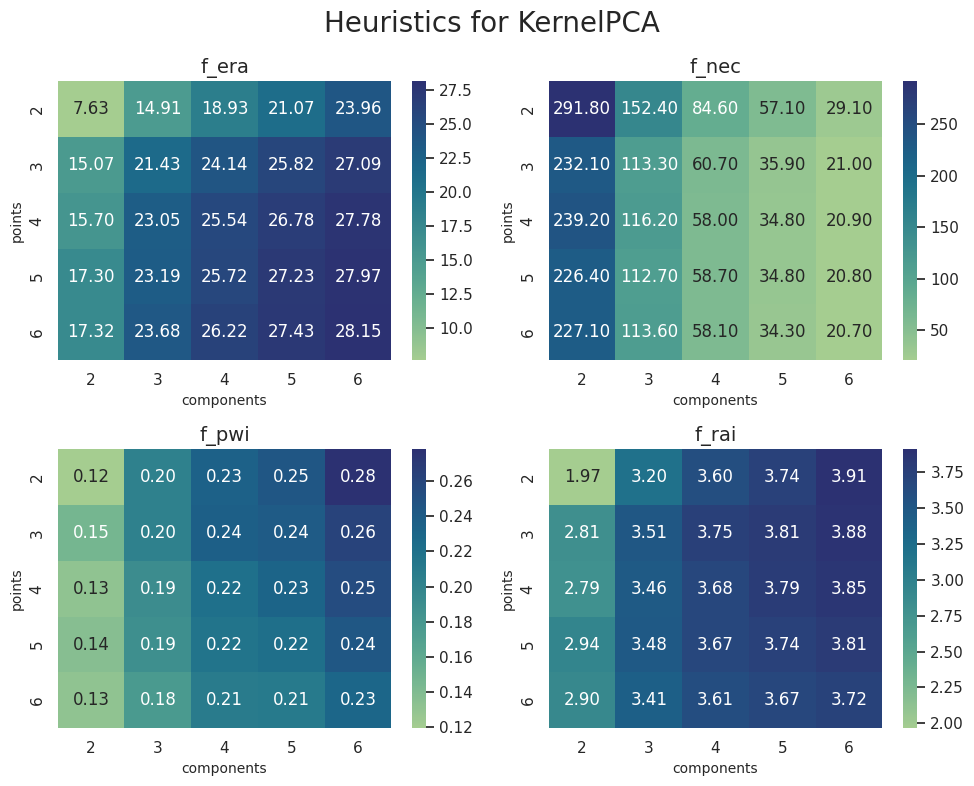

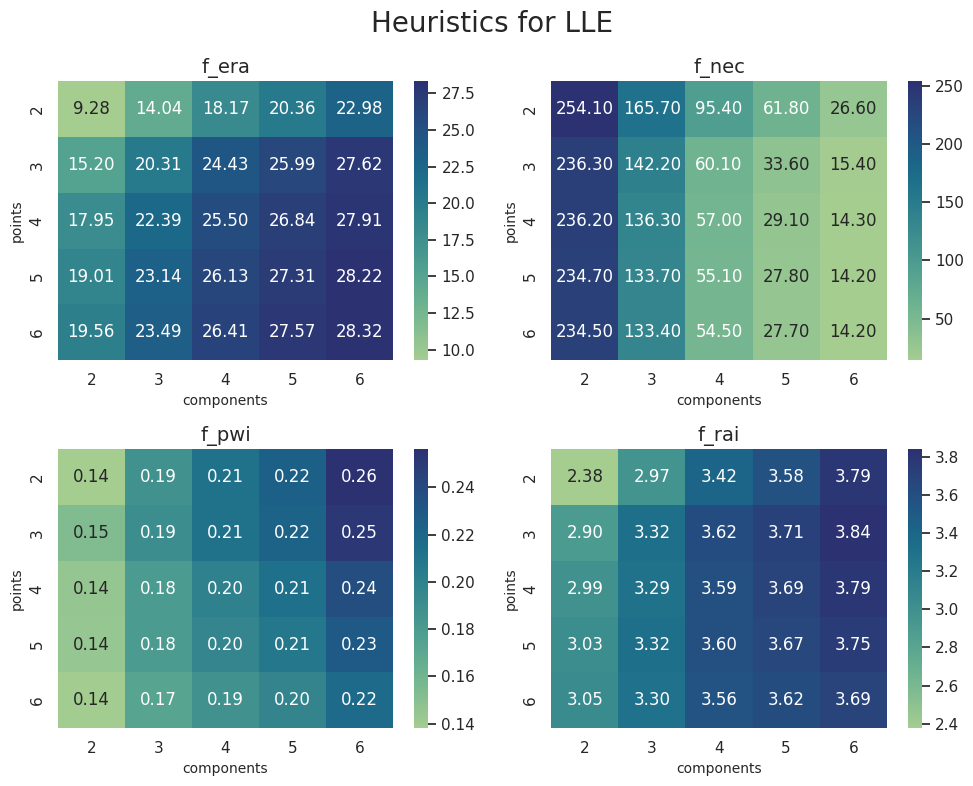

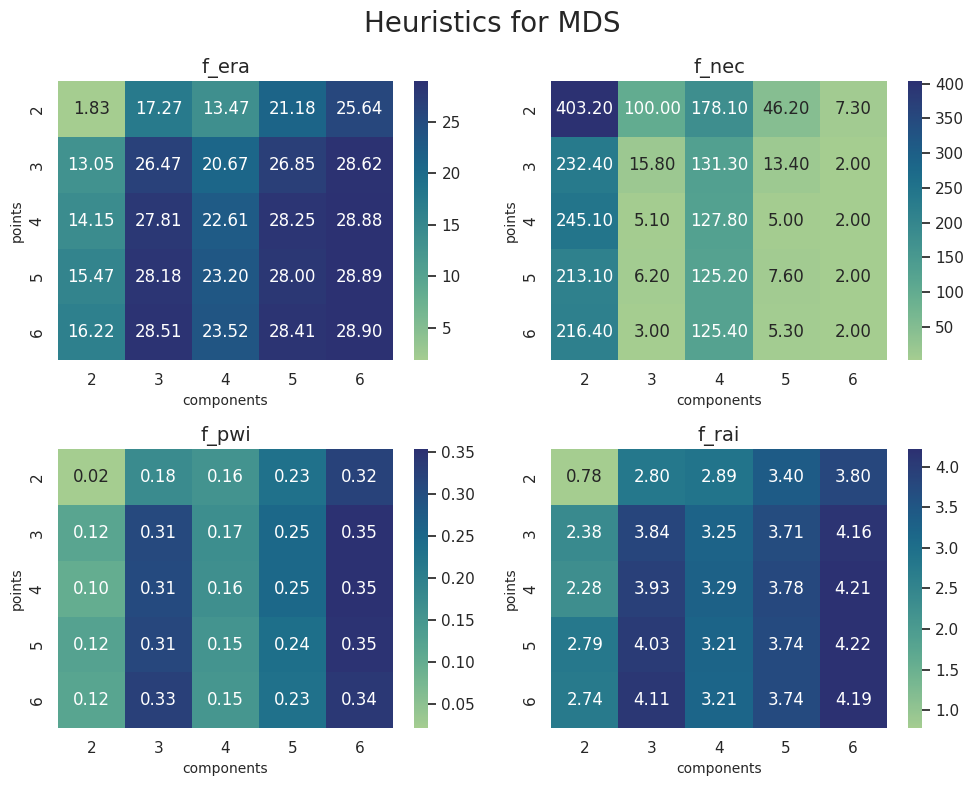

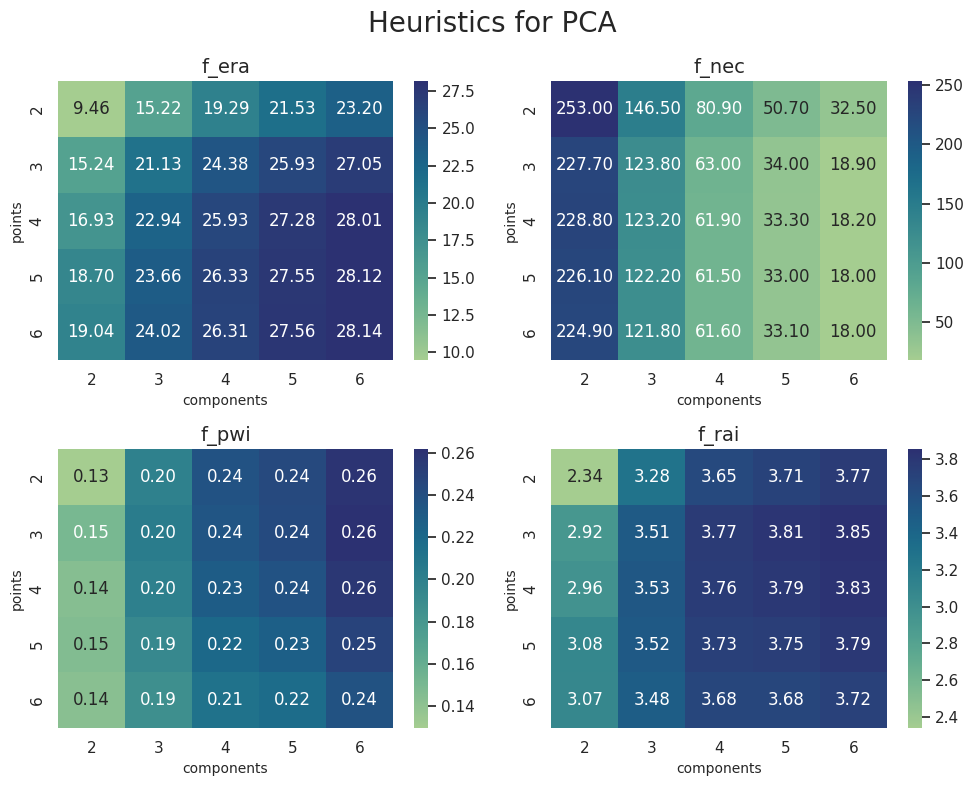

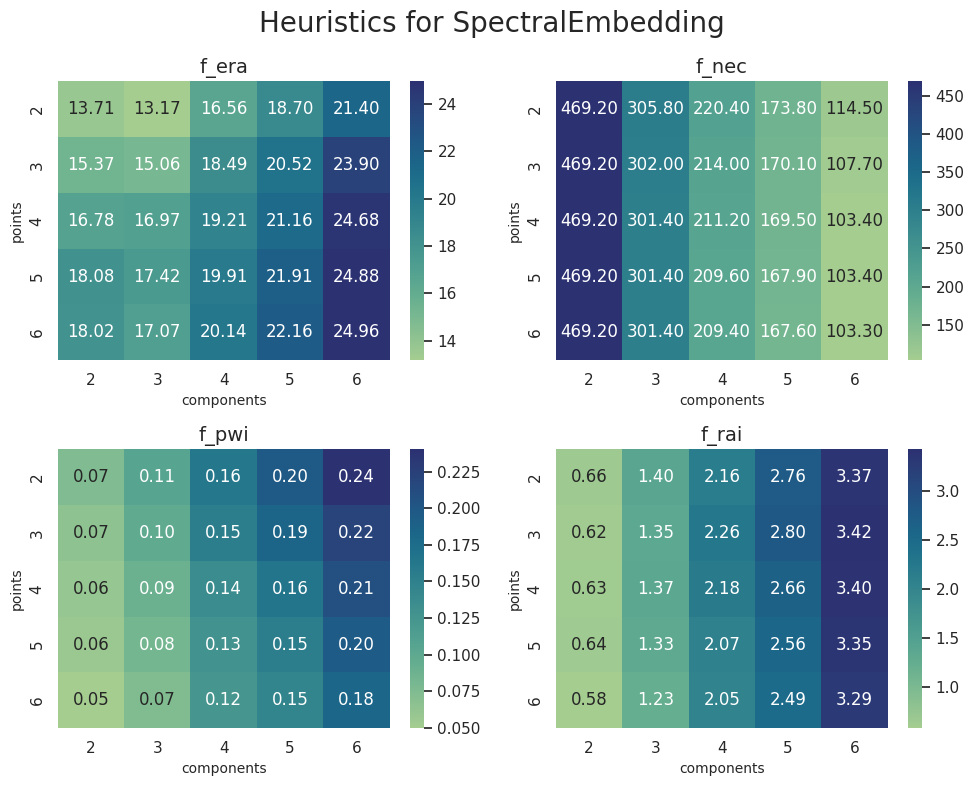

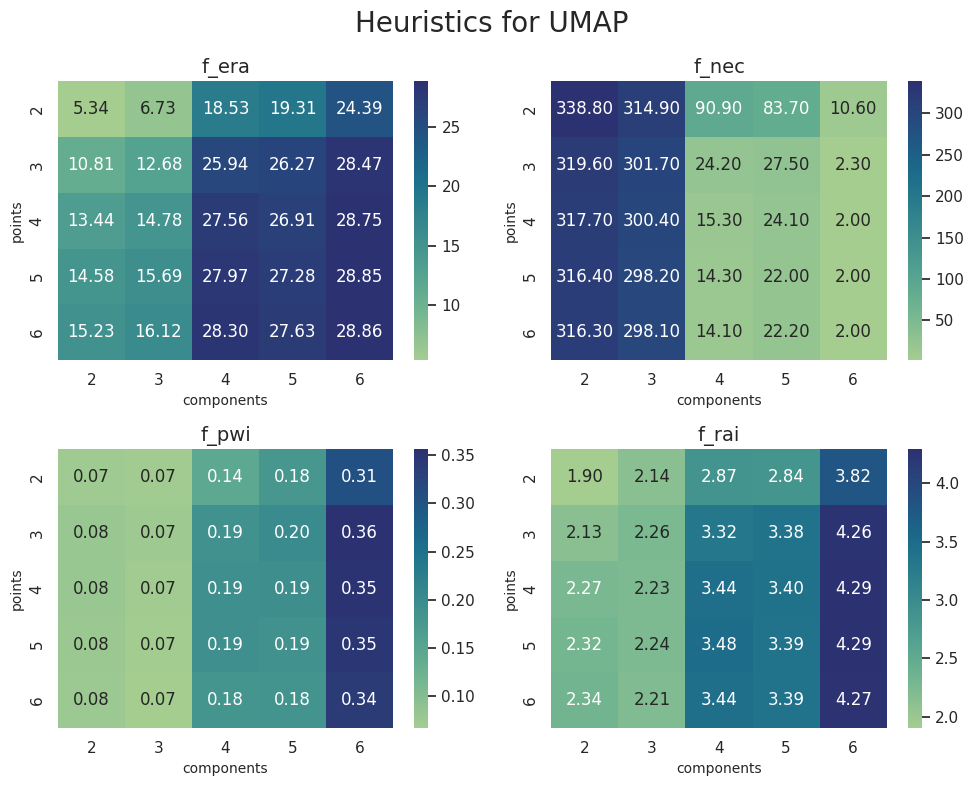

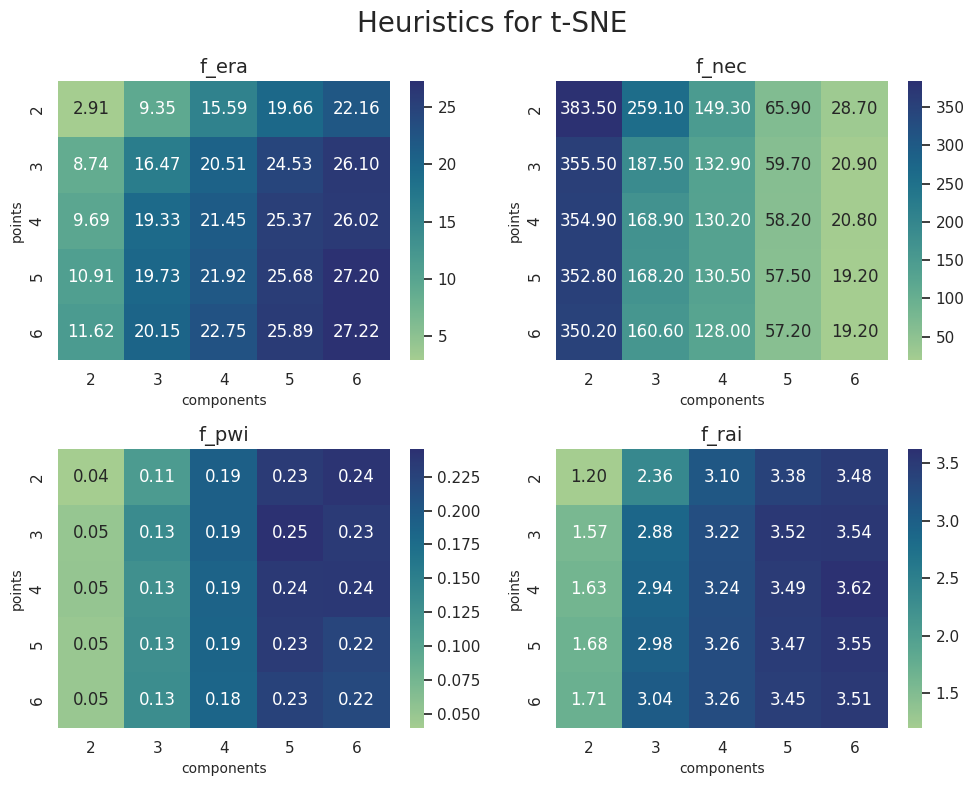

In [103]:
unique_n_points = df_results.index.get_level_values(1).unique()
heuristics = df_results.index.get_level_values(0).unique()

methods = df_results.columns.get_level_values(0).unique()

for method in methods:
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()

    for i, heuristic in enumerate(heuristics):
        df_r = (
            df_results[method]
            .loc[heuristic]
            .reset_index(names="points")
            .groupby("points")
            .agg('mean')
        )
        sns.heatmap(df_r, ax=axes[i], annot=True, fmt=".2f", cmap="crest")
        axes[i].set_title(heuristic, fontsize=14)
        axes[i].set_ylabel("points", fontsize=10)
        axes[i].set_xlabel("components", fontsize=10)
        # axes[i].set_ylabel(heuristic)
        # handles, _ = axes[i].get_legend_handles_labels()
        # axes[i].legend(title=COLOR, handles=handles, loc='upper left', bbox_to_anchor=(1, 1), markerscale=5)

    plt.suptitle(f"Heuristics for {method}", fontsize=20)
    plt.tight_layout()
    # plt.savefig(f"data/plots/eswaR1s_{method}.png")
    plt.show()